In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# %matplotlib inline 


-------------------df3------------------------------------------------
     problem_id difficulty                                               tags  \
0             3          0                                   [entrada-salida]   
1             3          0                                                NaN   
2             3          2                                                NaN   
3             3          1                     [matematicas, numeros-grandes]   
4             3          0                                                NaN   
5             3          0                                                NaN   
6             3          1                                                NaN   
7             3        NaN                                                NaN   
8             3          0                                                NaN   
9             3          0                                                NaN   
10            3          0            

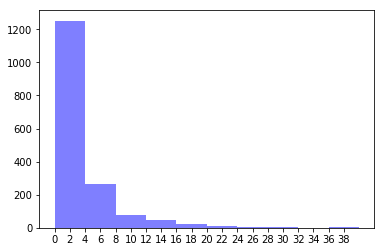

problems less than 5  (1359, 1)
         size
quality      
0.0       126
1.0        64
2.0       739
3.0      1507
4.0      1337
0         4
1         2
2       NaN
3         4
4         4
5         3
6       NaN
7         3
8       NaN
9         2
10        4
11        3
12        2
13        2
14      NaN
15      NaN
16        3
17        3
18        3
19        3
20      NaN
21      NaN
22        2
23      NaN
24        4
25        3
26        2
27        4
28      NaN
29        4
       ... 
5752      3
5753      0
5754    NaN
5755      3
5756      3
5757      2
5758    NaN
5759      4
5760      2
5761    NaN
5762    NaN
5763      0
5764    NaN
5765      4
5766      4
5767      0
5768      4
5769      4
5770      4
5771      4
5772    NaN
5773      3
5774    NaN
5775      4
5776      4
5777      4
5778      4
5779      4
5780      4
5781      3
Name: quality, Length: 5782, dtype: object
0       4
1       2
3       4
4       4
5       3
7       3
9       2
10      4
11      3
12   

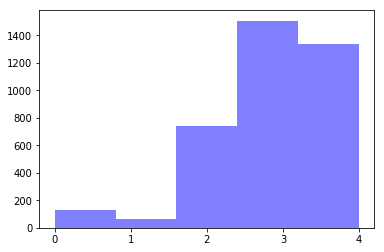

0         0
1         0
2         2
3         1
4         0
5         0
6         1
7       NaN
8         0
9         0
10        0
11        0
12        0
13        0
14        1
15        4
16        2
17        2
18        1
19        2
20        3
21        5
22        1
23        3
24        1
25        1
26        1
27        3
28        0
29        3
       ... 
5752      0
5753      0
5754      1
5755      1
5756    NaN
5757      0
5758    NaN
5759      1
5760      1
5761    NaN
5762    NaN
5763      0
5764    NaN
5765    NaN
5766      3
5767      0
5768      4
5769      4
5770      3
5771      2
5772    NaN
5773      2
5774    NaN
5775      0
5776      0
5777      0
5778      1
5779      4
5780      4
5781      1
Name: difficulty, Length: 5782, dtype: object
            size
difficulty      
0.0         1653
1.0         1656
2.0         1289
3.0          413
4.0          251
5.0            9
0       0
1       0
2       2
3       1
4       0
5       0
6       1
8       0
9     

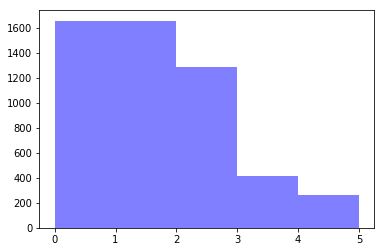

In [2]:
# { 
#   nomination:,
#   contents: {
#                 difficulty:
#                 tags :
#             }
# problem_id :
# }

with open('feedback.txt') as f:
    ind=0
    df3 = pd.DataFrame(columns=['problem_id','difficulty','tags','quality','nomination'])
    df4 = pd.DataFrame(columns=['problem_id','difficulty','tag','quality'])
    
    for l in f:
        df = pd.read_json(l,orient='records')
        
#       df2 = pd.DataFrame(index=[df.loc['difficulty']['problem_id']],columns=['difficulty','tags','quality','nomination'])
#         df2 = pd.DataFrame(columns=['problem_id','difficulty','tags','quality','nomination'])
        
        problem_id=None
        difficuly=None
        tags=None
        quality=None
        nomination=None
        
        dictn={}
        dictx={}
        
        dictn['problem_id']=df.iloc[0][2]
        dictx['problem_id']=dictn['problem_id']
        
#         if(dictn['problem_id'] == 711):
#             print(df)
        
        dictn['nomination'] = df.iloc[0][1]
        
        if 'difficulty' in df.index:
            dictn['difficulty']=df.loc['difficulty']['contents']
            dictx['difficulty']=dictn['difficulty']
        if 'quality' in df.index:
            dictn['quality'] = df.loc['quality']['contents']        
            dictx['quality']=dictn['quality']
        if 'tags' in df.index:
            dictn['tags']=df.loc['tags']['contents']

            #             problem_id has wierd source field and tag = None
        if ('tags' in dictn) and ( str(dictn['tags']) != 'nan' ) and dictn['tags'] is not None  :
#             print(str(dictn['tags']),type(dictn['tags']))
            l=dictn['tags']
#             print(dictn['problem_id'])
#             print('l=',type(l))
            for tag in l:
#                 print('k=',k)
                dictx['tag'] = tag
                df4 = df4.append(dictx,ignore_index=True)
        
        df3=df3.append(dictn,ignore_index=True)
#         df2.loc[ind]=[v  for k,v in dictn.items()]
#         ind=ind+1
    print("-------------------df3------------------------------------------------")
    print(df3)
    print("-------------------df4------------------------------------------------")
    print(df4)

# of problems with >= 5 feedback records. (problems need >= 5 records to be assigned a tag and shown on the UI)
    
grouped = df3.groupby('problem_id')
# print(grouped['problem_id'].agg([np.size]))
problems = grouped['problem_id'].agg([np.size])
problems = problems[problems['size'] >= 5]

print("problems greater than equal to 5" , problems.shape)

print("df3shape",df3.shape)
print(grouped['problem_id'].agg([np.size])['size'].tolist())

plt.hist(grouped['problem_id'].agg([np.size])['size'].tolist(),10,range=[0,40],facecolor='blue', alpha=0.5)
plt.xticks(np.arange(0, 40 , 2.0))
plt.show()

# of problems with >= 5 feedback records. (problems need >= 5 records to be assigned a tag and shown on the UI)

grouped = df3.groupby('problem_id')
# print(grouped['problem_id'].agg([np.size]))
problems = grouped['problem_id'].agg([np.size])
problems = problems[problems['size'] < 5]
print("problems less than 5 " , problems.shape)


# * Histogram of total number of votes for each possible difficulty.
grouped = df3.groupby('quality')
print(grouped['quality'].agg([np.size]))
# quality_h = grouped['quality'].agg([np.size])
# print("quality data" ,quality_h)
quality_h = df3['quality']
print(quality_h)
quality_h_n = quality_h.dropna()
print(quality_h_n)

plt.hist(quality_h_n.tolist(),5,facecolor='blue', alpha=0.5)
plt.xticks(np.arange(0, 5 , 1.0))
plt.show()

difficulty_h = df3['difficulty']
print(difficulty_h)
grouped = df3.groupby('difficulty')
print(grouped['difficulty'].agg([np.size]))
difficulty_h_n = difficulty_h.dropna()
print(difficulty_h_n)

plt.hist(difficulty_h_n.tolist(),5,facecolor='blue', alpha=0.5)
# plt.xticks(np.arange(0, 5 , 1.0))
plt.show()


# x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
# num_bins = 5
# n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
# plt.show()

# grouped = df.groupby('Team')
# print grouped['Points'].agg([np.sum, np.mean, np.std])


#         print(json.loads(l))
#         print(l)
        

In [ ]:
print(df4)

(85, 1)
0                         entrada-salida
1                            matematicas
2                        numeros-grandes
3                         entrada-salida
4                            matematicas
5                                   otro
6                           ordenamiento
7                       teoria-de-grafos
8                            pilas-colas
9                               arreglos
10                 programacion-dinamica
11                               arboles
12                 programacion-dinamica
13                             busquedas
14                               arboles
15                      busqueda-binaria
16      busqueda-en-amplitud-profundidad
17                              matrices
18      busqueda-en-amplitud-profundidad
19                                ciclos
20                     divide-y-venceras
21                        entrada-salida
22                  estructuras-de-datos
23                        if-else-switch
24      

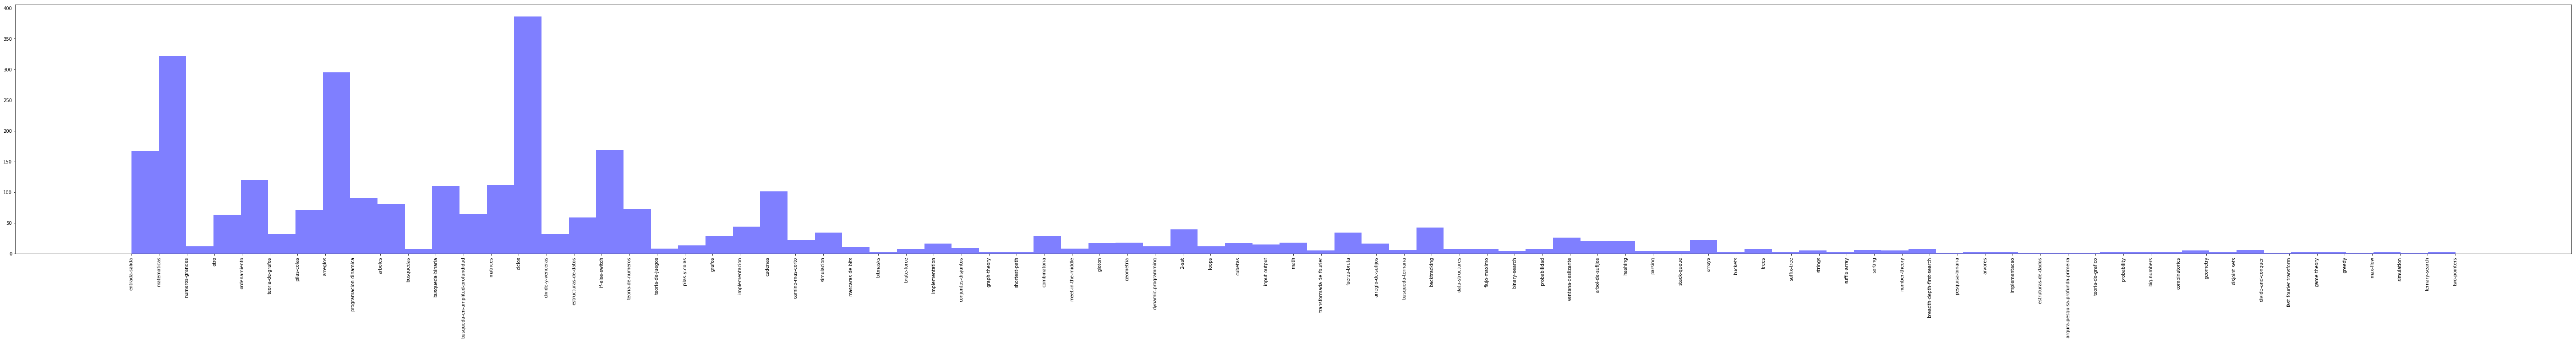

In [3]:
grp = df4.groupby('tag')
# grouped['difficulty'].agg([np.size])
tag_h= grp['tag'].agg([np.size])
print(tag_h.shape)

tag_h = df4['tag']
print(tag_h)

# n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
# plt.show()
plt.figure(figsize=(100,10))
n,bins,patches = plt.hist(tag_h.tolist(),85,facecolor='blue', alpha=0.5)

print(n,type(n))
print(bins,type(bins))
print(patches,type(patches))
# plt.xtickslabels(tag_h.tolist(),fontsize=12)
plt.xticks(rotation=+90)
plt.show()
# plt.figure(figsize=(20,10))
# plt.bar(tag_h.tolist(),tag, align='center',tick_label=tag_h.tolist())
# plt.xlim([0, 89])
# plt.xticks(rotation=+90)
# plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]),
 <a list of 85 Text xticklabel objects>)

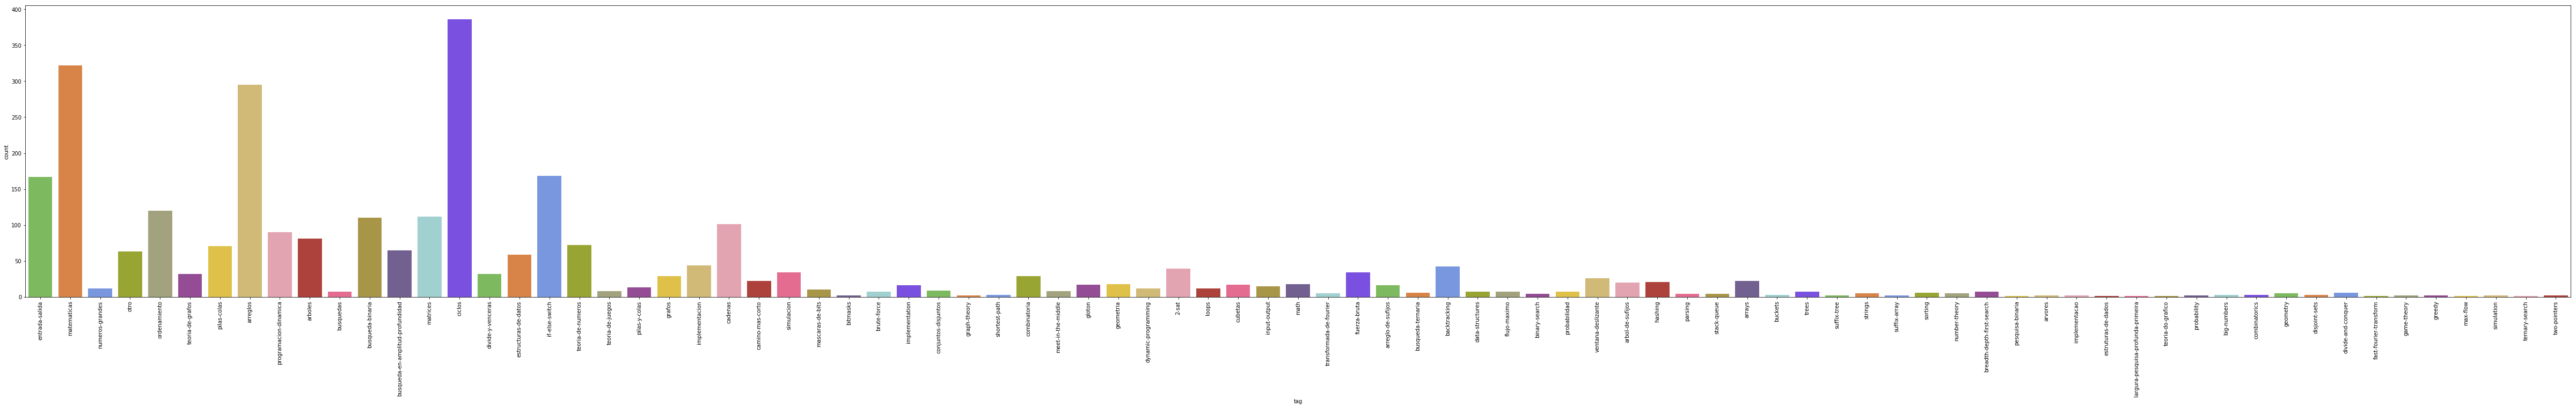

In [4]:


pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# print(df4)

# votes by tag
plt.figure(figsize=(85,10))
sns.countplot(x='tag', data=df4, palette=pkmn_type_colors)
plt.xticks(rotation=+90)



85


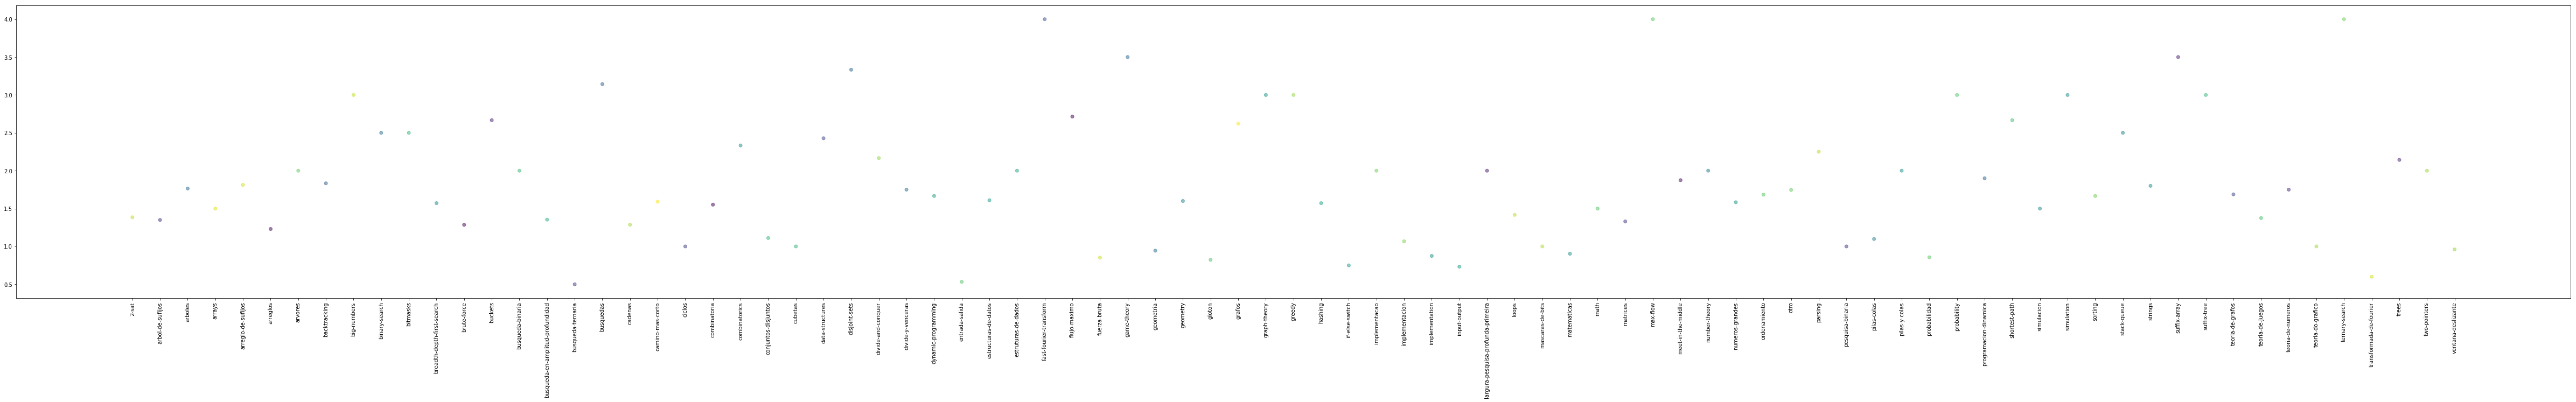

In [13]:
grp = df4.groupby(['tag'])
grp= grp['difficulty'].agg([np.sum,np.size])
grp['avg_difficulty'] = grp['sum']/grp['size']
grp['tag'] = grp.index
# print(grp)


plt.figure(figsize=(85,10))
# sns.countplot(x='tag', data=df4, palette=pkmn_type_colors)

# sns.lmplot(x='tag', y='avg_difficulty', data=grp,
#            fit_reg=False # No regression line
#            )   # Color by evolution stage



x= grp['tag']
y= grp['avg_difficulty']
N= (grp.shape)[0]
print(N)
colors = np.random.rand(N)

plt.scatter(x, y, c=colors, alpha=0.5)

plt.xticks(rotation=+90)
# plt.xlim(0,None)
# plt.ylim(0,None)
plt.show()

                                   sum  size  avg_quality  \
tag                                                         
2-sat                              104    39     2.666667   
arbol-de-sufijos                    45    20     2.250000   
arboles                            180    81     2.222222   
arrays                              59    22     2.681818   
arreglo-de-sufijos                  32    16     2.000000   
arreglos                           822   295     2.786441   
arvores                              5     2     2.500000   
backtracking                       125    42     2.976190   
big-numbers                         11     3     3.666667   
binary-search                       15     4     3.750000   
bitmasks                             8     2     4.000000   
breadth-depth-first-search          25     7     3.571429   
brute-force                         21     7     3.000000   
buckets                             10     3     3.333333   
busqueda-binaria        

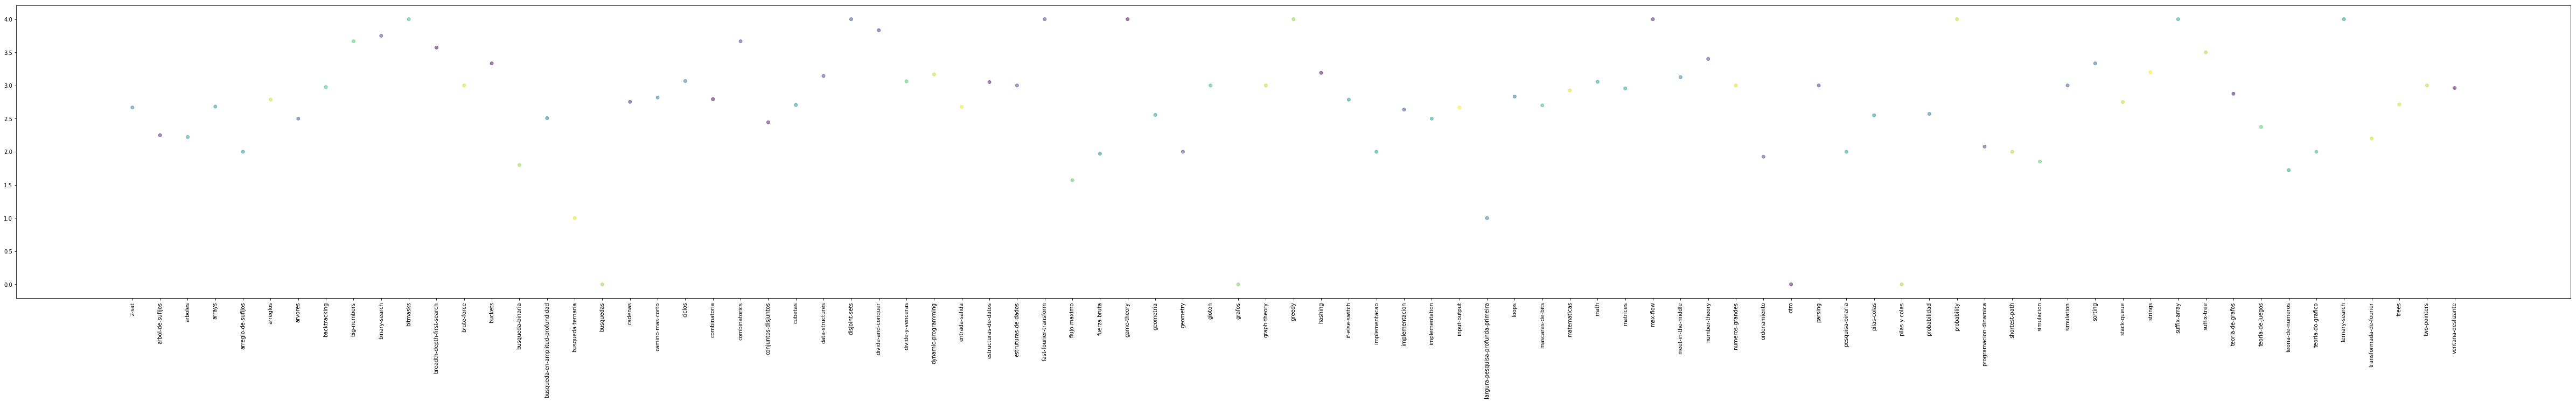

In [16]:
grp = df4.groupby(['tag'])
grp= grp['quality'].agg([np.sum,np.size])
grp['avg_quality'] = grp['sum']/grp['size']
grp['tag'] = grp.index
# print(grp)

plt.figure(figsize=(85,10))
x= grp['tag']
y= grp['avg_quality']
N= (grp.shape)[0]
# print(N)
colors = np.random.rand(N)
plt.scatter(x, y, c=colors, alpha=0.5)
plt.xticks(rotation=+90)
plt.show()
